In [ ]:
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import cv2
import time
import tensorflow as tf
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import pathlib

2022-06-12 22:53:36.222984: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
%matplotlib inline

In [ ]:
url='http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz'
model_name='efficientdet_d1_coco17_tpu-32_upper'

In [ ]:
paths = {
    'workspace': os.path.join('Tensorflow','workspace'),
    'labelmap': os.path.join('Tensorflow','workspace','data','family','label_map.pbtxt'),
    'train_record': os.path.join('Tensorflow','workspace','data','family','train.record'),
    'test_record': os.path.join('Tensorflow','workspace','data','family','test.record'),
    'test_dir': os.path.join('Tensorflow','workspace','dataset','validation'),
    'family_map': os.path.join('Tensorflow','workspace','data','family_map.yaml'),
    'exported_models': os.path.join('Tensorflow','workspace','exported_models'),
    'exported_model': os.path.join('Tensorflow','workspace','exported_models',model_name),
    'pre_trained_models': os.path.join('Tensorflow','workspace','pre_trained_models'),
    'pre_trained_model': os.path.join('Tensorflow','workspace','pre_trained_models',model_name),
    'models': os.path.join('Tensorflow','workspace','models'),
    'model': os.path.join('Tensorflow','workspace','models',model_name),
    'pipeline': os.path.join('Tensorflow','workspace','models',model_name,'pipeline.config'),
    'train_script': os.path.join('Tensorflow','model_main_tf2.py'),
    'export_script': os.path.join('Tensorflow','exporter_main_v2.py')
}

In [ ]:
download_command = 'wget --no-check-certificate {} -O {}.tar.gz'.format(
    url, 
    os.path.join(paths['pre_trained_models'],model_name)
)

print(download_command)

wget --no-check-certificate http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz -O Tensorflow/workspace/pre_trained_models/efficientdet_d1_coco17_tpu-32_upper.tar.gz


In [ ]:
!{download_command}

--2022-06-09 22:51:09--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.36.240, 2a00:1450:4016:80a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.36.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘Tensorflow/workspace/pre_trained_models/efficientdet_d1_coco17_tpu-32_upper.tar.gz’

Tensorflow/workspac 100%[===================>]  49,44M  21,3MB/s    in 2,3s    

2022-06-09 22:51:13 (21,3 MB/s) - ‘Tensorflow/workspace/pre_trained_models/efficientdet_d1_coco17_tpu-32_upper.tar.gz’ saved [51839363/51839363]



In [ ]:
untar_command =  'tar -zxvf {}.tar.gz -C {}'.format(
    os.path.join(paths['pre_trained_models'],model_name),
    os.path.join(paths['pre_trained_models'])
    )
print(untar_command)

tar -zxvf Tensorflow/workspace/pre_trained_models/efficientdet_d1_coco17_tpu-32_upper.tar.gz -C Tensorflow/workspace/pre_trained_models


In [ ]:
!{untar_command}

efficientdet_d1_coco17_tpu-32/
efficientdet_d1_coco17_tpu-32/checkpoint/
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d1_coco17_tpu-32/pipeline.config
efficientdet_d1_coco17_tpu-32/saved_model/
efficientdet_d1_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d1_coco17_tpu-32/saved_model/assets/
efficientdet_d1_coco17_tpu-32/saved_model/variables/
efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/saved_model/variables/variables.index


In [ ]:
!mkdir -p {paths['model']}

In [ ]:
!cp {os.path.join(paths['pre_trained_model'],'pipeline.config')} {paths['model']}

In [ ]:
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(paths['labelmap'], use_display_name=True)

In [ ]:
config = config_util.get_configs_from_pipeline_file(paths['pipeline'])

config

{'model': ssd {
   num_classes: 31
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 640
       max_dimension: 640
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "ssd_efficientnet-b1_bifpn_keras"
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: SWISH
       batch_norm {
         decay: 0.9900000095367432
         scale: true
         epsilon: 0.0010000000474974513
       }
       force_use_bias: true
     }
     bifpn {
       min_level: 3
       max_level: 7
       num_iterations: 4
       num_filters: 88
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 1.0
       x_scale: 1.0
       height_scale: 1.0
       width_scale: 1.0
     }
   }
   matcher {
     argmax_matc

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(paths['pipeline'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  



In [ ]:
pipeline_config.model.ssd.num_classes = len(category_index)
pipeline_config.model.ssd.loss.localization_weight = 0.8
pipeline_config.model.ssd.loss.classification_weight = 1.3
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['pre_trained_model'],'checkpoint','ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path= paths['labelmap']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [paths['train_record']]
pipeline_config.eval_input_reader[0].label_map_path = paths['labelmap']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [paths['test_record']]

'''
  data_augmentation_options {
    random_horizontal_flip {
    }
  }
  data_augmentation_options {
    random_vertical_flip {
    }
  }
  data_augmentation_options {
    random_adjust_hue {
    }
  }
  data_augmentation_options {
    random_adjust_contrast {
    }
  }
  data_augmentation_options {
    random_adjust_saturation {
    }
  }
  data_augmentation_options {
    random_adjust_brightness {
    }
  } 

   first_stage_anchor_generator {
     grid_anchor_generator {
       aspect_ratios: 1.0
     }
   }

   second_stage_post_processing {
     batch_non_max_suppression {
       max_detections_per_class: 20
       max_total_detections: 100
     }
   }
'''

'\n  data_augmentation_options {\n    random_horizontal_flip {\n    }\n  }\n  data_augmentation_options {\n    random_vertical_flip {\n    }\n  }\n  data_augmentation_options {\n    random_adjust_hue {\n    }\n  }\n  data_augmentation_options {\n    random_adjust_contrast {\n    }\n  }\n  data_augmentation_options {\n    random_adjust_saturation {\n    }\n  }\n  data_augmentation_options {\n    random_adjust_brightness {\n    }\n  } \n'

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(paths['pipeline'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train

In [ ]:
num_train_steps=30000
train_command = 'python {} --model_dir={} --pipeline_config_path={} --num_train_steps {}'.format(
    paths['train_script'], paths['model'], paths['pipeline'], num_train_steps
)

print(train_command)

python Tensorflow/model_main_tf2.py --model_dir=Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper --pipeline_config_path=Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper/pipeline.config --num_train_steps 30000


In [ ]:
# Evaluation During Training: run parallel to training
eval_command = 'CUDA_VISIBLE_DEVICES="-1" python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}'.format(
    paths['train_script'],
    paths['model'],
    paths['pipeline'],
    paths['model']
)
print(eval_command)

CUDA_VISIBLE_DEVICES="-1" python Tensorflow/model_main_tf2.py --model_dir=Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper --pipeline_config_path=Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper


In [ ]:
# monitor GPU: run parallel to training
print('watch -n 0.5 nvidia-smi')

watch -n 0.5 nvidia-smi


In [ ]:
tensorboard_command = 'tensorboard --logdir={} --host=0.0.0.0'.format(paths['models'])
print(tensorboard_command)

tensorboard --logdir=Tensorflow/workspace/models --host=0.0.0.0


In [ ]:
!{train_command}

2022-06-10 12:28:54.250485: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-10 12:28:55.746928: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-06-10 12:28:55.764945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 12:28:55.765271: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-06-10 12:28:55.765288: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-10 12:28:55.766355: I tensorflow/stream_executor/plat

# Export

In [ ]:
print(paths['exported_model'])

Tensorflow/workspace/exported_models/efficientdet_d1_coco17_tpu-32_upper


In [ ]:
!mkdir -p {paths['exported_model']}

In [ ]:
export_command = 'python {} --input_type image_tensor --pipeline_config_path {} --trained_checkpoint_dir {} --output_directory {}'.format(
    paths['export_script'],
    paths['pipeline'],
    paths['model'],
    paths['exported_model']
)

print(export_command)

python Tensorflow/exporter_main_v2.py --input_type image_tensor --pipeline_config_path Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper/pipeline.config --trained_checkpoint_dir Tensorflow/workspace/models/efficientdet_d1_coco17_tpu-32_upper --output_directory Tensorflow/workspace/exported_models/efficientdet_d1_coco17_tpu-32_upper


In [ ]:
!{export_command}

2022-06-10 17:57:54.952555: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-10 17:58:06.616461: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-06-10 17:58:06.619261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 17:58:06.619554: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-06-10 17:58:06.619566: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-10 17:58:06.620517: I tensorflow/stream_executor/plat

# Test

In [ ]:
detect_fn = tf.saved_model.load(os.path.join(paths['exported_model'],'saved_model'))

2022-06-12 22:53:55.051436: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-06-12 22:53:55.068284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-12 22:53:55.068574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-06-12 22:53:55.068591: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-12 22:53:55.069524: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-06-12 22:53:55.070566: I tensorflow/stream_executor/platfo

In [ ]:
class_names = [i['name'] for i in category_index.values()]

In [ ]:
import yaml

with open(paths['family_map']) as f:
    family_map = yaml.load(f, Loader=yaml.FullLoader)

family_map

{'Asteraceae': ['Asteraceae',
  'Artemisia',
  'Cardus',
  'Centaurea',
  'Cichorium',
  'Cirsium',
  'Cirsium yildizianum',
  'Echinops',
  'Gundelia',
  'Helianthus',
  'Helichrysum',
  'Onopordum',
  'Ptilostemon',
  'Xanthium',
  'Xeranthemum'],
 'Fabaceae': ['Astragalus',
  'Astragalus gummifer',
  'Coronilla',
  'Hedysarum',
  'Lotus',
  'Trifolium',
  'Vicia',
  'Melilotus',
  'Astragalus longifolius'],
 'Lamiaceae': ['Lamium',
  'Lamium macrodon',
  'Origanum',
  'Thymus',
  'Teucrium',
  'Phlomis'],
 'Rosaceae': ['Rosaceae',
  'Filipendula',
  'Potentilla',
  'Rosa canina',
  'Sanguisorba minor'],
 'Malvaceae': ['Malvaceae', 'Alcea', 'Malva', 'Tilia'],
 'Caprifoliaceae': ['Cephalaria', 'Scabiosa', 'Valeriana'],
 'Caryophllaceae': ['Caryophllaceae', 'Silene', 'Dianthus'],
 'Rutaceae': ['Citrus'],
 'Convolvulaceae': ['Convolvulus'],
 'Xanthorrhoeaceae': ['Eremurus'],
 'Euphorbiaceae': ['Euphorbia'],
 'Rubiaceae': ['Gallium'],
 'Geraniaceae': ['Geranium'],
 'Hypericaceae': ['Hype

In [ ]:
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

def get_upper_class(c):
    for k,v in family_map.items():
        if (c.lower() in [x.lower() for x in v]):
            return k
    print('class not found: ', c)
    
total = len(os.listdir(paths['test_dir']))
counter = 1
true = []
predictions = []
scores = []
for class_path in os.listdir(paths['test_dir']):
    for image_path in os.listdir(os.path.join(paths['test_dir'], class_path)):
        path = pathlib.Path(image_path)
        if not path.suffix == '.jpg' and not path.suffix == '.png':
            continue

        full_path = os.path.join(paths['test_dir'], class_path, image_path)

        image = cv2.imread(full_path, -1)

        if len(image.shape) < 3:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        input_tensor = tf.convert_to_tensor(image)
        input_tensor = input_tensor[tf.newaxis, ...]
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                        for key, value in detections.items()}
        detections['num_detections'] = num_detections

        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        score_head = detections['detection_scores'][0]
        class_head = detections['detection_classes'][0]
        upper_class = get_upper_class(class_path.lower().strip()).lower().strip()
        print(upper_class, category_index[class_head]['name'], score_head)

        true.append(upper_class)
        predictions.append(category_index[class_head]['name'])
        counter += 1

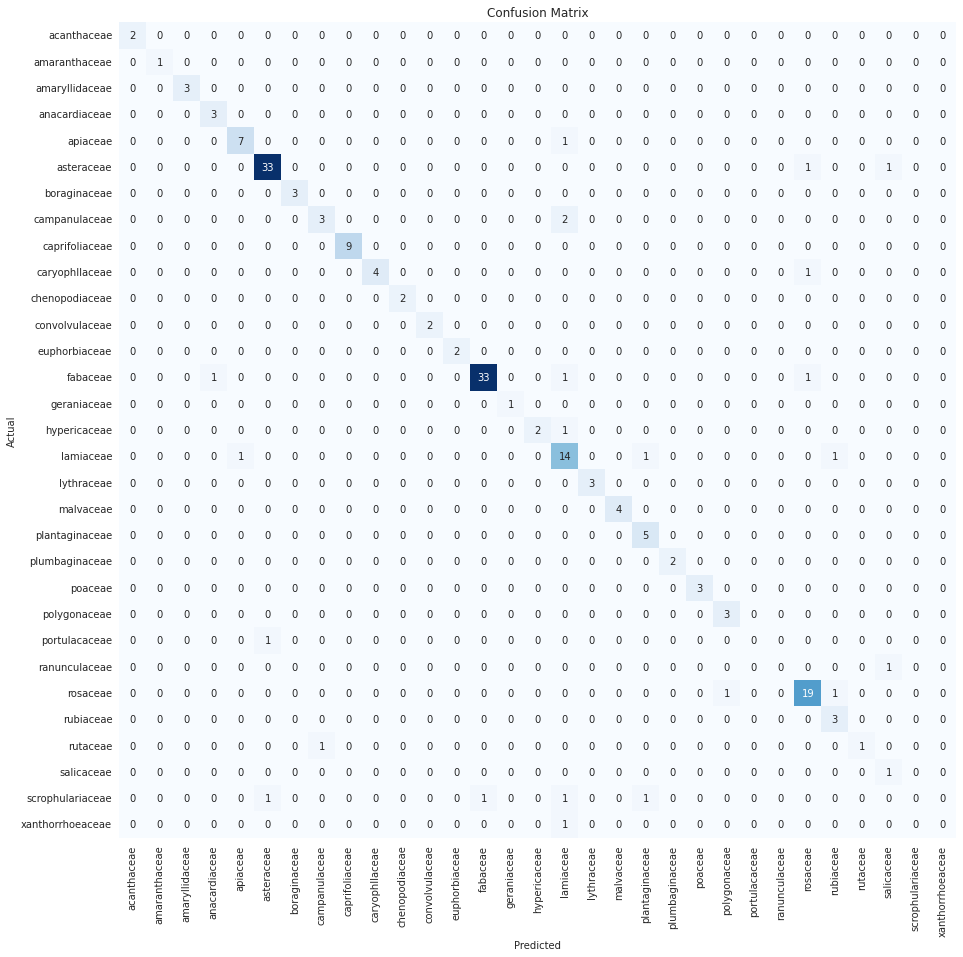

Classification Report:
----------------------
                   precision    recall  f1-score   support

     acanthaceae       1.00      1.00      1.00         2
   amaranthaceae       1.00      1.00      1.00         1
  amaryllidaceae       1.00      1.00      1.00         3
   anacardiaceae       0.75      1.00      0.86         3
        apiaceae       0.88      0.88      0.88         8
      asteraceae       0.94      0.94      0.94        35
    boraginaceae       1.00      1.00      1.00         3
   campanulaceae       0.75      0.60      0.67         5
  caprifoliaceae       1.00      1.00      1.00         9
  caryophllaceae       1.00      0.80      0.89         5
  chenopodiaceae       1.00      1.00      1.00         2
  convolvulaceae       1.00      1.00      1.00         2
   euphorbiaceae       1.00      1.00      1.00         2
        fabaceae       0.97      0.92      0.94        36
     geraniaceae       1.00      1.00      1.00         1
    hypericaceae       1

/home/rog/anaconda3/envs/fatih_tf22/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rog/anaconda3/envs/fatih_tf22/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rog/anaconda3/envs/fatih_tf22/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

cm = confusion_matrix(true, predictions)
length=len(class_names)
fig_width= int(length * .5)
fig_height= int(length * .5)
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, np.unique(true), rotation= 90)
plt.yticks(np.arange(length)+.5, np.unique(true), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true, predictions)
print("Classification Report:\n----------------------\n", clr)